# Decision Trees and Ensemble Learning

This notebook covers:
- Decision Tree Training
- Visualization of a Decision Tree
- Voting Classifier
- Bagging and Boosting
- Random Forests

Dataset: Titanic (classification task)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\saghi\AppData\Local\Temp\ipykernel_29136\504952898.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\saghi\AppData\Local\Temp\ipykernel_29136\504952898.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

## Train and Visualize a Decision Tree

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



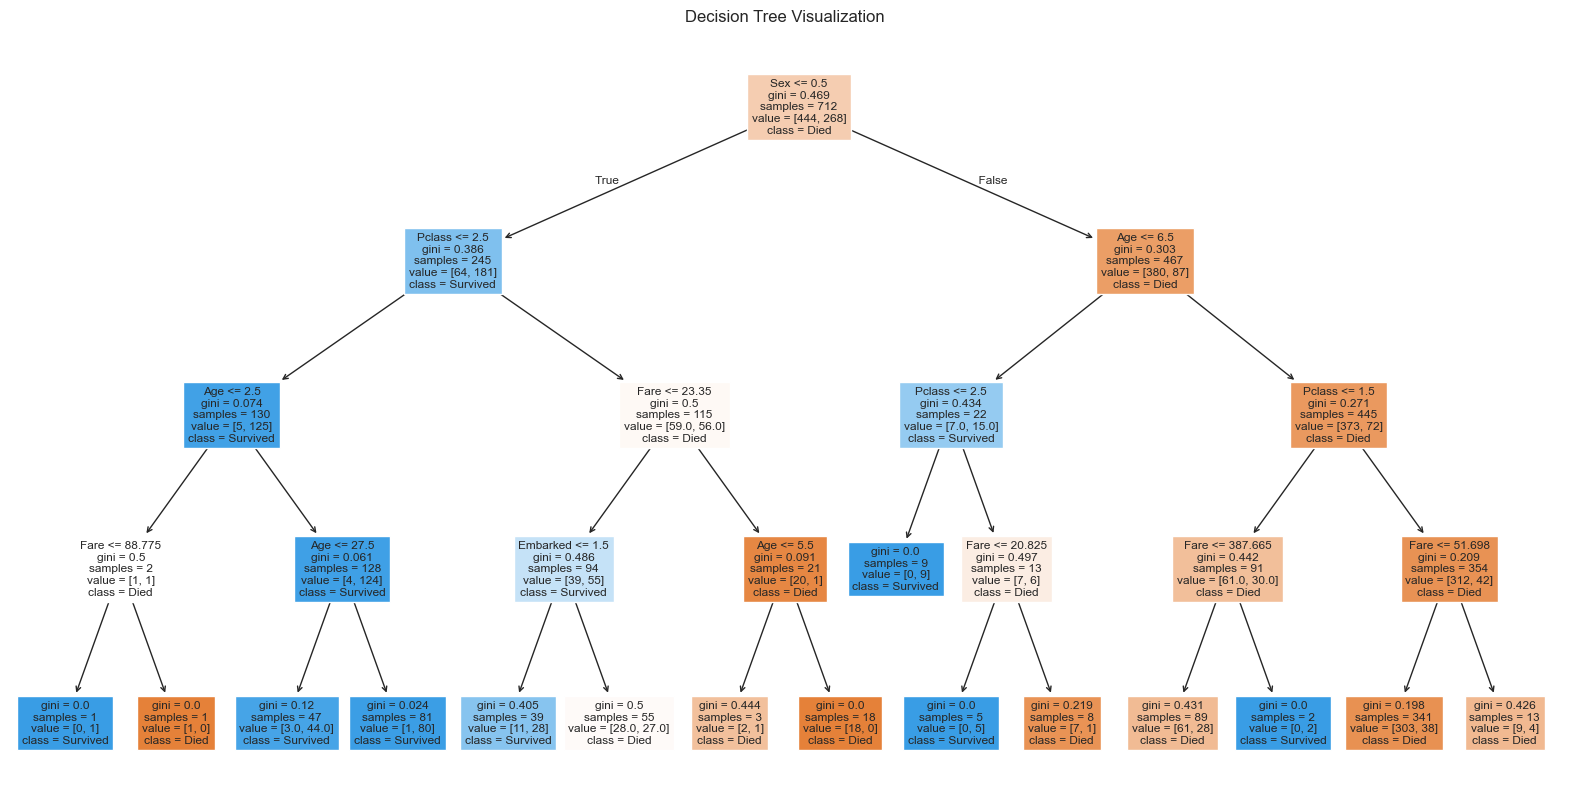

In [2]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(classification_report(y_test, y_pred_tree))
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=['Died', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## Hard Voting Classifier

In [3]:
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier())
], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred_vote))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## Random Forest

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



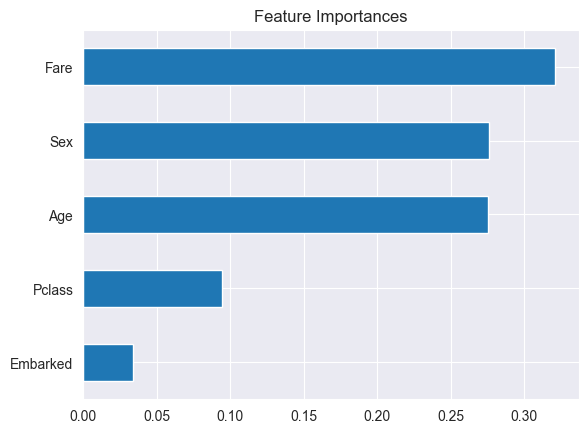

In [4]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print(classification_report(y_test, y_pred_forest))

importances = pd.Series(forest.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()


## Exercises

### 1. Try Different Depths for the Decision Tree
Try `max_depth` values of 2, 4, 6, and 10. What depth gives the best generalization?

```python
# Example:
for depth in [2, 4, 6, 10]:
...
```

---

### 2. Try Soft Voting Instead of Hard Voting
Change the `VotingClassifier` to use `voting='soft'` and compare accuracy.

---

### 3. Tune the Random Forest with GridSearchCV
Use `GridSearchCV` to find the best number of trees and max depth.

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, None]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
```


#

In [5]:
# Test the Random Forest with different parameters
for n_estimators in [50, 100]:
    for max_depth in [2,4,6,10]:
        forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        forest.fit(X_train, y_train)
        y_pred_forest = forest.predict(X_test)
        print(f"Random Forest with n_estimators={n_estimators}, max_depth={max_depth}")
        print(classification_report(y_test, y_pred_forest))


Random Forest with n_estimators=50, max_depth=2
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       105
           1       0.80      0.58      0.67        74

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.74       179
weighted avg       0.77      0.77      0.76       179

Random Forest with n_estimators=50, max_depth=4
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest with n_estimators=50, max_depth=6
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                          

 Meilleure généralisation :
n_estimators = 100

max_depth = 6

Ce modèle offre :

Accuracy : 83%

F1-score pondérée : 0.82

Exercice 2: Soft Voting Classifier

In [6]:
log_clf = LogisticRegression()
svc_clf = SVC(probability=True)
tree_clf = DecisionTreeClassifier()

soft_voting = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svc_clf), ('dt', tree_clf)],
    voting='soft'
)

soft_voting.fit(X_train, y_train)
y_pred_soft = soft_voting.predict(X_test)

print("Soft Voting Classifier")
print(classification_report(y_test, y_pred_soft))


Soft Voting Classifier
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Le Soft Voting Classifier fait légèrement mieux que le Hard Voting ici.

Cela est cohérent car le soft voting exploite les probabilités prédites, ce qui donne un avantage quand les modèles sont bien calibrés.

In [ ]:
Exercice 3: Random Forest with GridSearchCV

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, None]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

# Évaluation sur le test set
y_pred_grid = grid.best_estimator_.predict(X_test)
print("Test set performance:")
print(classification_report(y_test, y_pred_grid))


Best parameters: {'max_depth': 6, 'n_estimators': 50}
Best cross-validation accuracy: 0.8342558849601103
Test set performance:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



Meilleurs hyperparamètres trouvés :

n_estimators = 50

max_depth = 6

Meilleure précision moyenne (cross-validation) :

83.43%